Eigenenergies harmonic potential
[ 0.0006  0.0019  0.0032  0.0044  0.0057  0.007   0.0082]
Eigenenergies harmonic potential, normalized to 2 eval[0]
[ 0.5     1.5     2.4998  3.4996  4.4994  5.4991  6.499 ]
Eigenenergies anharmonic potential
[ 0.0006  0.0019  0.0033  0.0046  0.006   0.0074  0.0088]
Eigenenergies anharmonic potential, normalized to 2 eval4[0]
[ 0.5     1.511   2.5433  3.5957  4.6672  5.757   6.8643]
Difference of the normalized anharmonic eigenvalues
[ 1.011   1.0323  1.0524  1.0716  1.0898  1.1072]


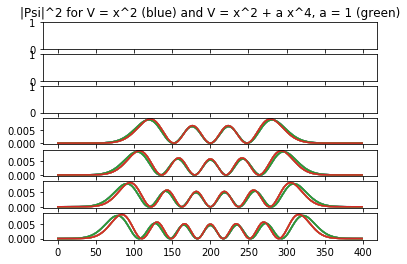

In [44]:
import numpy as np
from types import SimpleNamespace
from matplotlib import pyplot
np.set_printoptions(precision=4, linewidth=200)

def SetUpH(p, doPlot = False):
	# Simple tight binding model for a 1D chain with an onsite potential
	def pot(x):
		pvec = np.zeros(p.L, dtype=float)
		for cnt, xval in enumerate(x):
			pvec[cnt] = 2*p.t \
				+ p.px2*np.power((xval - p.L/2),2) \
				+ p.px4*np.power((xval - p.L/2),4)
		return pvec
	if doPlot: pyplot.plot(list(range(p.L)), pot(list(range(p.L))))
	
	H = np.diag(pot(list(range(p.L))))
	
	for cnt in range(p.L-1):
		H[cnt,cnt+1] = -p.t
		H[cnt+1,cnt] = -p.t
		
	return H

# Parameters for the Harmonic H
# L ist the number of sites
# px2 is the prefactor of quadratic potential
# px4 is the prefactor of the x^4 potential
# t is the hopping
px2set = 0.0000004
p  = SimpleNamespace(L = 400, px2 = px2set, px4 = 0.00*px2set, t=1.0)
# Parameters for the Anharmonic H.
p4 = SimpleNamespace(L = 400, px2 = px2set, px4 = 0.00001*px2set, t=1.0)

# Harmonic H
ham = SetUpH(p, False)
# Anharmonic H
ham4 = SetUpH(p4, False)
#pyplot.draw()

# Compute eigensystems
evals, evecs = np.linalg.eigh(ham)
evals4, evecs4 = np.linalg.eigh(ham4)

# Numbers of eigenstates to plot
n = range(7)

# Print eigenenergies
print("Eigenenergies harmonic potential"); 
print(evals[n])
print("Eigenenergies harmonic potential, normalized to 2 eval[0]"); 
print(evals[n]/(2*evals[0]))
print("Eigenenergies anharmonic potential"); 
print(evals4[n])
print("Eigenenergies anharmonic potential, normalized to 2 eval4[0]"); 
print(evals4[n]/(2*evals4[0]))
print("Difference of the normalized anharmonic eigenvalues"); 
evalsdiff = np.zeros(len(n)-1)
for cnt in range(len(n)-1):
	evalsdiff[cnt] = \
		(evals4[cnt + 1]/(2*evals4[0])) - \
		(evals4[cnt]/(2*evals4[0]))
print(evalsdiff)

# Plot wavefunctions
f, axarr = pyplot.subplots(len(n), sharex=True)
for cntn in n:
	axarr[6].plot(range(p.L), np.abs(evecs[:, 6])**2)
	axarr[6].plot(range(p.L), np.abs(evecs4[:, 6])**2)
	axarr[5].plot(range(p.L), np.abs(evecs[:, 5])**2)
	axarr[5].plot(range(p.L), np.abs(evecs4[:, 5])**2)
	axarr[4].plot(range(p.L), np.abs(evecs[:, 4])**2)
	axarr[4].plot(range(p.L), np.abs(evecs4[:, 4])**2)
	axarr[3].plot(range(p.L), np.abs(evecs[:, 3])**2)
	axarr[3].plot(range(p.L), np.abs(evecs4[:, 3])**2)

axarr[0].set_title("|Psi|^2 for V = x^2 (blue) and V = x^2 + a x^4, a = 1 (green)")
pyplot.show()


In [27]:
#evals[n]
evals4[n]

array([ 0.0006,  0.0019,  0.0032,  0.0044,  0.0057,  0.007 ,  0.0082])

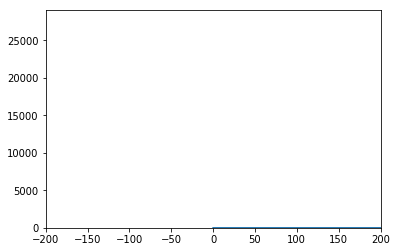

In [57]:
v=np.linspace(-300,300,1000)
from matplotlib import pyplot as plt
#plt.plot(v,v*v,'k')
#plt.plot(v,v**2+0.00001*v**4,'r')
plt.plot(range(p.L),100* np.abs(evecs4[:, 3])**2)
plt.xlim(-200,200)
plt.ylim(0,29000)
#plt.legend("ah")
plt.show()


In [37]:
en1=evals[n]

en2=evals4[n]
n=[0,1,2,3,4,5,6]

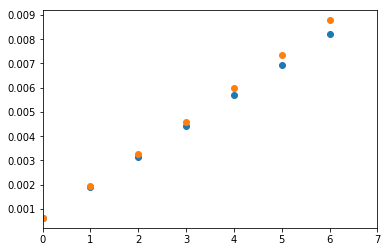

In [38]:
plt.plot(n,en1,'o')
plt.plot(n,en2,'o')
plt.xlim(0,7)
plt.show()

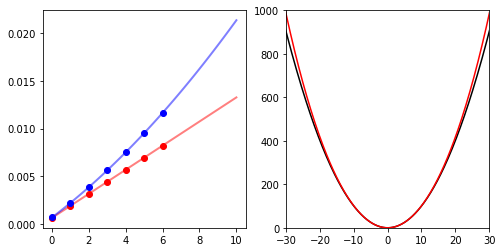

In [16]:
from matplotlib import pyplot as plt
import numpy

fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

ax = axes[0]
coefficients1 = numpy.polyfit(n, en1, 1)
coefficients2 = numpy.polyfit(n,en2, 2)
polynomial1 = numpy.poly1d(coefficients1)
polynomial2 = numpy.poly1d(coefficients2)
x2=np.linspace(0,10,100)
ys1 = polynomial1(x2)
ys2 = polynomial2(x2)
ax.plot(x2,ys1,'r',lw=2,alpha=0.5)
ax.plot(x2,ys2,'b',lw=2,alpha=0.5)
ax.plot(n,en1,'or')
ax.plot(n,en2,'ob')

ax2= axes[1]
plt.plot(v,v*v,'k')
plt.plot(v,v**2+0.0001*v**4,'r')
plt.xlim(-30,30)
plt.ylim(0,1000)
#plt.legend("ah")
plt.show()

In [92]:
polynomial2

poly1d([ 0.0251,  0.0403])

In [93]:
coefficients2

array([ 0.0251,  0.0403])

In [94]:
coefficients1

array([ 0.0013,  0.0006])